In [7]:
import numpy as np
DTYPE = np.float32

E_M = 10e-7
H_OPT=np.sqrt(E_M)

def g(x: float):
    return np.cos(x, dtype=DTYPE)

def f(x: float):
    return np.exp(x, dtype=DTYPE)

def diff_forward(f_x, x, h):
    return (f_x(x + h) - f_x(x))/h

def diff_central(f_x, x, h):
    return (f_x(x + h) - f_x(x - h)) / (2.0 * h)

def diff_extrapolate(f_x, x, h):
    h = np.float32(h)
    return (-f_x(x + 2 * h) + 8 * f_x(x + h) - 8 * f_x(x - h) + f_x(x - 2 * h)) / (12.0 * h)

a = .1
b = 10
h_opt = E_M**(1/2)

real_cos_a = -np.sin(a, dtype=DTYPE)
real_cos_b = -np.sin(b, dtype=DTYPE)
real_exp_a = np.exp(a, dtype=DTYPE)
real_exp_b = np.exp(b, dtype=DTYPE)

print("=== Forward ===")
w = diff_forward(g, a, h_opt)
x = diff_forward(g, b, h_opt)
y = diff_forward(f, a, h_opt)
z = diff_forward(f, b, h_opt)

print(f'd/dt(cos({a})) ~= {w}, err={(real_cos_a - w)/w:.2e}')
print(f'd/dt(cos({b})) ~= {x}, err={(real_cos_b - x)/x:.2e}')
print(f'd/dt(exp({a})) ~= {y}, err={(real_exp_a - y)/y:.2e}')
print(f'd/dt(exp({b})) ~= {z}, err={(real_exp_b - z)/z:.2e}')

w = diff_central(g, a, h_opt)
x = diff_central(g, b, h_opt)
y = diff_central(f, a, h_opt)
z = diff_central(f, b, h_opt)
h_opt = E_M**(1/3)
print ("\n== Central ==")
print(f'd/dt(cos({a})) ~= {w}, err={(real_cos_a - w)/w:.2e}')
print(f'd/dt(cos({b})) ~= {x}, err={(real_cos_b - x)/x:.2e}')
print(f'd/dt(exp({a})) ~= {y}, err={(real_exp_a - y)/y:.2e}')
print(f'd/dt(exp({b})) ~= {z}, err={(real_exp_b - z)/z:.2e}')

w = diff_extrapolate(g, a, h_opt)
x = diff_extrapolate(g, b, h_opt)
y = diff_extrapolate(f, a, h_opt)
z = diff_extrapolate(f, b, h_opt)

h_opt = E_M**(1/5)
print("\n== Extrapolated ==")
print(f'd/dt(cos({a})) ~= {w}, err={(real_cos_a - w)/w:.2e}')
print(f'd/dt(cos({b})) ~= {x}, err={(real_cos_b - x)/x:.2e}')
print(f'd/dt(exp({a})) ~= {y}, err={(real_exp_a - y)/y:.2e}')
print(f'd/dt(exp({b})) ~= {z}, err={(real_exp_b - z)/z:.2e}')


print("\n== Real value ==")
print(f'd/dt(cos({a})) ~= {real_cos_a}')
print(f'd/dt(cos({b})) ~= {real_cos_b}')
print(f'd/dt(exp({a})) ~= {real_exp_a}')
print(f'd/dt(exp({b})) ~= {real_exp_b}')

=== Forward ===
d/dt(cos(0.1)) ~= -0.10031461715698242, err=-4.80e-03
d/dt(cos(10)) ~= 0.5446076393127441, err=-1.08e-03
d/dt(exp(0.1)) ~= 1.1057853698730469, err=-5.56e-04
d/dt(exp(10)) ~= 22046.875, err=-9.26e-04

== Central ==
d/dt(cos(0.1)) ~= -0.0998079776763916, err=2.55e-04
d/dt(cos(10)) ~= 0.5442202091217041, err=-3.66e-04
d/dt(exp(0.1)) ~= 1.105189323425293, err=-1.66e-05
d/dt(exp(10)) ~= 22036.1328125, err=-4.39e-04

== Extrapolated ==
d/dt(cos(0.1)) ~= -0.09983331188186956, err=1.10e-06
d/dt(cos(10)) ~= 0.5440324666507348, err=-2.09e-05
d/dt(exp(0.1)) ~= 1.1051635194482199, err=6.74e-06
d/dt(exp(10)) ~= 22027.083825677022, err=-2.80e-05

== Real value ==
d/dt(cos(0.1)) ~= -0.0998334214091301
d/dt(cos(10)) ~= 0.5440210700035095
d/dt(exp(0.1)) ~= 1.1051709651947021
d/dt(exp(10)) ~= 22026.466796875


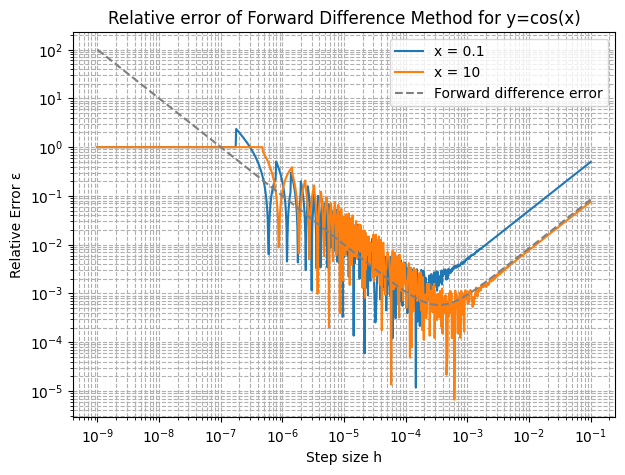

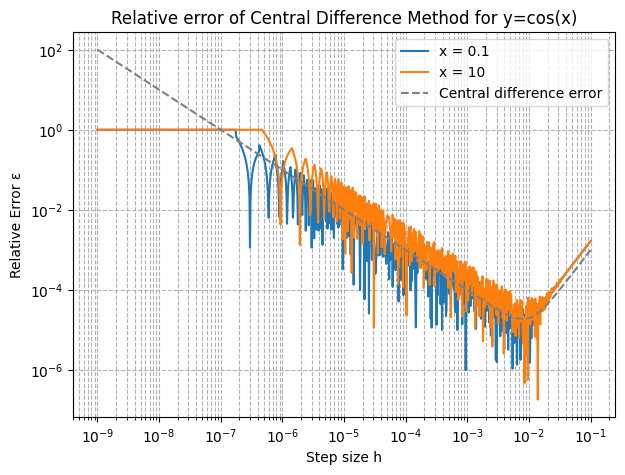

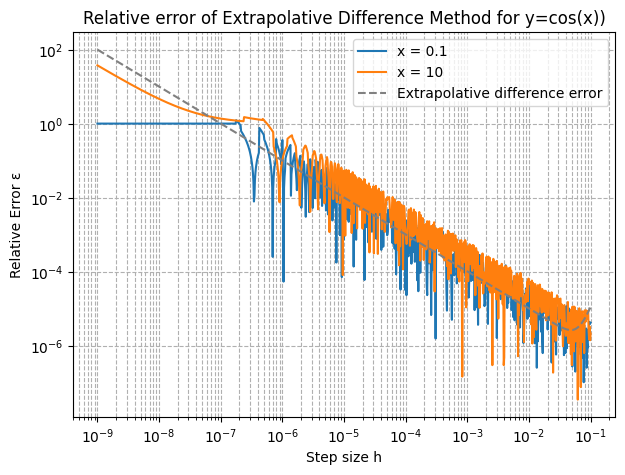

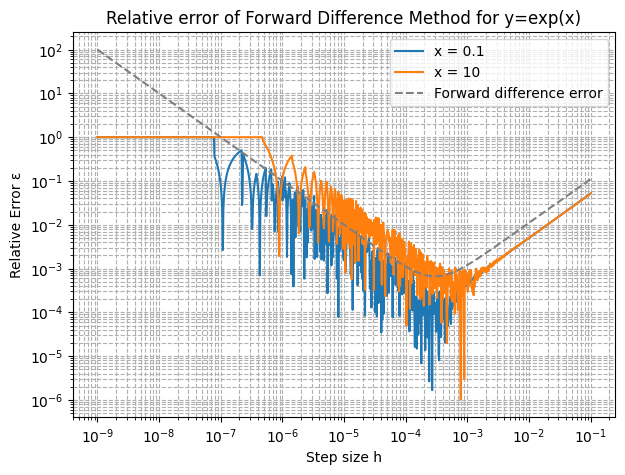

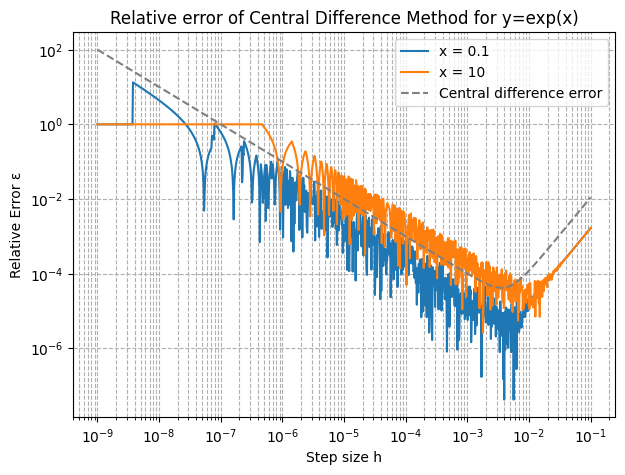

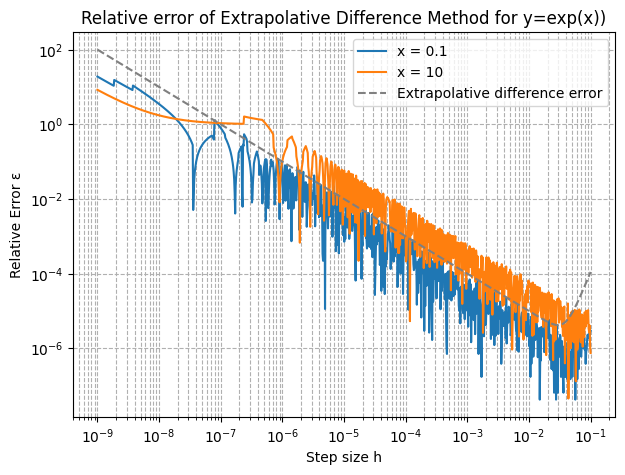

In [28]:
import matplotlib.pyplot as plt

# Define the true derivative for comparison
def true_derivative_g(x):
    return -np.sin(x)

# Generate a range of h values (step sizes)
h_values = np.logspace(-9, -1, 1000, dtype=DTYPE)

def rel_error_g(method, x, h):
    approx = method(g, x, h)
    true_val = -np.sin(x) # Don't give DTYPE here to avoid precision issues
    return np.abs((approx - true_val) / true_val)

def rel_error_f(method, x, h):
    approx = method(f, x, h)
    true_val = np.exp(x)
    return np.abs((approx - true_val) / true_val)
# Compute relative errors for forward difference

def plot_rel_err_f(function_name):
    plt.figure(figsize=(7,5))
    plt.loglog(h_values, rel_error_f(diff_forward, .1, h_values), label='x = 0.1')
    plt.loglog(h_values, rel_error_f(diff_forward, 10, h_values), label='x = 10')
    plt.loglog(h_values, h_values * np.abs(np.exp(.1)) + 1e-7/h_values, '--', label='Forward difference error', color='gray')
    plt.xlabel('Step size h')
    plt.ylabel('Relative Error ε')
    plt.title(f'Relative error of Forward Difference Method for y={function_name}(x)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

    plt.figure(figsize=(7,5))
    plt.loglog(h_values, rel_error_f(diff_central, .1, h_values), label='x = 0.1')
    plt.loglog(h_values, rel_error_f(diff_central, 10, h_values), label='x = 10')
    plt.loglog(h_values, h_values**2 * np.abs(np.exp(.1)) + 1e-7/h_values, '--', label='Central difference error', color='gray')
    plt.xlabel('Step size h')
    plt.ylabel('Relative Error ε')
    plt.title(f'Relative error of Central Difference Method for y={function_name}(x)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()


    plt.figure(figsize=(7,5))
    plt.loglog(h_values, rel_error_f(diff_extrapolate, .1, h_values), label='x = 0.1')
    plt.loglog(h_values, rel_error_f(diff_extrapolate, 10, h_values), label='x = 10')
    plt.loglog(h_values, h_values**4 * np.abs(np.exp(.1)) + 1e-7/h_values, '--', label='Extrapolative difference error', color='gray')
    plt.xlabel('Step size h')
    plt.ylabel('Relative Error ε')
    plt.title(f'Relative error of Extrapolative Difference Method for y={function_name}(x))')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

def plot_rel_err_g(function_name):
    plt.figure(figsize=(7,5))
    plt.loglog(h_values, rel_error_g(diff_forward, .1, h_values), label='x = 0.1')
    plt.loglog(h_values, rel_error_g(diff_forward, 10, h_values), label='x = 10')
    plt.loglog(h_values, h_values * np.abs(np.cos(10)) + 1e-7/h_values, '--', label='Forward difference error', color='gray')
    plt.xlabel('Step size h')
    plt.ylabel('Relative Error ε')
    plt.title(f'Relative error of Forward Difference Method for y={function_name}(x)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

    plt.figure(figsize=(7,5))
    plt.loglog(h_values, rel_error_g(diff_central, .1, h_values), label='x = 0.1')
    plt.loglog(h_values, rel_error_g(diff_central, 10, h_values), label='x = 10')
    plt.loglog(h_values, h_values**2 * np.abs(np.sin(.1)) + 1e-7/h_values, '--', label='Central difference error', color='gray')
    plt.xlabel('Step size h')
    plt.ylabel('Relative Error ε')
    plt.title(f'Relative error of Central Difference Method for y={function_name}(x)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()


    plt.figure(figsize=(7,5))
    plt.loglog(h_values, rel_error_g(diff_extrapolate, .1, h_values), label='x = 0.1')
    plt.loglog(h_values, rel_error_g(diff_extrapolate, 10, h_values), label='x = 10')
    plt.loglog(h_values, h_values**4 * np.abs(np.sin(.1)) + 1e-7/h_values, '--', label='Extrapolative difference error', color='gray')
    plt.xlabel('Step size h')
    plt.ylabel('Relative Error ε')
    plt.title(f'Relative error of Extrapolative Difference Method for y={function_name}(x))')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

plot_rel_err_g('cos')

plot_rel_err_f('exp')